In [1]:
!wget https://raw.githubusercontent.com/vidoolytech/hiringtask/master/machine_learning/ad_org/data/mn/ad_org_train.csv
!wget https://raw.githubusercontent.com/vidoolytech/hiringtask/master/machine_learning/ad_org/data/mn/ad_org_test.csv

--2019-03-19 11:34:26--  https://raw.githubusercontent.com/vidoolytech/hiringtask/master/machine_learning/ad_org/data/mn/ad_org_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 747966 (730K) [text/plain]
Saving to: ‘ad_org_train.csv.2’

ad_org_train.csv.2  100%[===================>] 730.44K  --.-KB/s    in 0.06s   

2019-03-19 11:34:26 (11.2 MB/s) - ‘ad_org_train.csv.2’ saved [747966/747966]

--2019-03-19 11:34:31--  https://raw.githubusercontent.com/vidoolytech/hiringtask/master/machine_learning/ad_org/data/mn/ad_org_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP reques

In [1]:
!ls

ad_org_test.csv    ad_org_test.csv.2  ad_org_train.csv.1  sample_data
ad_org_test.csv.1  ad_org_train.csv   ad_org_train.csv.2


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
df = pd.read_csv("ad_org_train.csv")

In [4]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [0]:
df.duration = df.duration.str.lower()

In [6]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,pt7m37s,F
1,VID_14135,2,1707,56,2,6,2016-10-01,pt9m30s,D
2,VID_2187,1,2023,25,0,2,2016-07-02,pt2m16s,C
3,VID_23096,6,620860,777,161,153,2016-07-27,pt4m22s,H
4,VID_10175,1,666,1,0,0,2016-06-29,pt31s,D


In [0]:
def calsec(a):
  if len(a) == 1:
    return a[0]
  elif len(a) ==2:
    return a[0]*60.0 + a[1]
  else:
    return a[0]*3600 + a[1]*60 + a[2]

In [0]:
def extractsec(input): 
     numbers = re.findall('\d+',input)
     numbers = map(int,numbers) 
     l = list(numbers)
     return calsec(l)

In [0]:
"""Converting duration in seconds"""
df['duration'] = df['duration'].apply(extractsec).astype(float)

In [10]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,457.0,F
1,VID_14135,2,1707,56,2,6,2016-10-01,570.0,D
2,VID_2187,1,2023,25,0,2,2016-07-02,136.0,C
3,VID_23096,6,620860,777,161,153,2016-07-27,262.0,H
4,VID_10175,1,666,1,0,0,2016-06-29,31.0,D


In [11]:
df.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [0]:
df = df.drop('vidid',axis=1)

In [13]:
for x in list(df.columns.values):
  print(x,type(df[x].iloc[0]))


adview <class 'numpy.int64'>
views <class 'str'>
likes <class 'str'>
dislikes <class 'str'>
comment <class 'str'>
published <class 'str'>
duration <class 'numpy.float64'>
category <class 'str'>


In [0]:
cnames=['views','likes','dislikes','comment','duration','category','adview']

In [0]:
un_cat = list(df['category'].unique())

In [16]:
d = {}
for key,value in enumerate(un_cat):
  d[value] = ord(value)-65

print(d)

{'F': 5, 'D': 3, 'C': 2, 'H': 7, 'E': 4, 'B': 1, 'G': 6, 'A': 0}


In [0]:
df['category'] = df['category'].apply(lambda cat:d[cat])

In [0]:
df = df.drop('published',axis=1)

In [19]:
for x in cnames:
  df[x] = df[x].convert_objects(convert_numeric=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [21]:
df.head()

,adview,views,likes,dislikes,comment,duration,category
0,40,1031602.0,8523.0,363.0,1095.0,457.0,5
1,2,1707.0,56.0,2.0,6.0,570.0,3
2,1,2023.0,25.0,0.0,2.0,136.0,2
3,6,620860.0,777.0,161.0,153.0,262.0,7
4,1,666.0,1.0,0.0,0.0,31.0,3


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


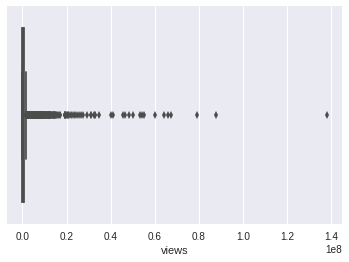

In [22]:
sns.boxplot(df['views'])

In [0]:
cnames=['views','likes','dislikes','comment','category','duration']

Finding Outliers and replacing them with nan.

In [24]:
for i in cnames:
    fq, tq = np.percentile(df.loc[:,i], [75 ,25])
    quartile_range = tq - fq
    maxvalue = fq - (quartile_range*1.5)
    minvalue = tq + (quartile_range*1.5)
    df.loc[df.loc[:,i] < minvalue,:i] = np.nan
    df.loc[df.loc[:,i] > maxvalue,:i] = np.nan

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [25]:
df.isnull().sum()

adview      2057
views       2059
likes       2183
dislikes    2183
comment     2235
duration    2057
category       0
dtype: int64

In [0]:
cnames=['views','likes','dislikes','comment','category','duration','adview']
for i in cnames:
    df[i] = df[i].fillna(df[i].median())

In [0]:
maxad = max(df['adview'])
minad = min(df['adview'])

In [0]:
for i in cnames:
  df[i]=(df[i]-min(df[i]))/(max(df[i])-min(df[i]))

In [29]:
df.isnull().sum()

adview      0
views       0
likes       0
dislikes    0
comment     0
duration    0
category    0
dtype: int64

In [0]:
cnames = ['views','likes','dislikes','comment','duration','category']
x = df[cnames]
y = df['adview']

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [0]:
lreg = LinearRegression()
model = lreg.fit(x_train,y_train)

In [0]:
pred = model.predict(x_test)

In [34]:
pred[:10]

array([3.79637260e-04, 9.19122021e-04, 1.37289322e-03, 2.80933211e-04,
       4.70910768e-04, 3.34949547e-04, 4.96055814e-05, 3.10434354e-04,
       4.05879586e-04, 6.01469464e-04])

In [0]:
loss = np.sqrt(mean_squared_error(y_test,pred))

In [36]:
print("Root Mean Squared Error:{}".format(loss))

Root Mean Squared Error:0.0038730322749445938


In [0]:
df2 = pd.read_csv("ad_org_test.csv")

In [38]:
df2.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [39]:
cnames=['views','likes','dislikes','comment','duration','category']
df2.duration = df2.duration.str.lower()
df2['duration'] = df2['duration'].apply(extractsec).astype(float)
df2['category'] = df2['category'].apply(lambda cat:d[cat])
for x in cnames:
  df2[x] = df2[x].convert_objects(convert_numeric=True)
for i in cnames:
  df2[i]=(df2[i]-min(df2[i]))/(max(df2[i])-min(df2[i]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [40]:
df2.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,0.001955,0.019224,0.006052,0.016152,2017-02-18,0.010841,0.142857
1,VID_18629,0.004620,0.025529,0.009438,0.012282,2016-06-28,0.009389,0.714286
2,VID_13967,0.000127,0.000097,0.000305,0.000012,2014-03-10,0.055003,0.428571
3,VID_19442,0.005848,0.007136,0.006940,0.003214,2010-06-05,0.014374,0.857143
4,VID_770,0.008408,0.007870,0.006246,0.001361,2016-09-03,0.004525,0.142857


In [0]:
for i in cnames:
    df2[i] = df2[i].fillna(df2[i].median())

In [0]:
eval_x = df2[cnames]

In [48]:
eval_x.isnull().sum()

views       0
likes       0
dislikes    0
comment     0
duration    0
category    0
dtype: int64

In [0]:
eval_y = model.predict(eval_x)

In [0]:
out = (eval_y * (maxad-minad) + minad).astype(np.int64)

In [0]:
out=list(out)

In [0]:
vidid = list(df2['vidid'])

In [0]:
output = {'vivid':vidid,'adview':out}

In [0]:
output = pd.DataFrame(output)

In [0]:
output = output[['vivid','adview']]

In [68]:
output.head()

,vivid,adview
0,VID_1054,3494
1,VID_18629,5981
2,VID_13967,2313
3,VID_19442,4220
4,VID_770,2970


In [0]:
output.to_csv("submission.csv", encoding='utf-8', index=False)

In [70]:
!ls

ad_org_test.csv    ad_org_test.csv.2  ad_org_train.csv.1  sample_data
ad_org_test.csv.1  ad_org_train.csv   ad_org_train.csv.2  submission.csv


In [0]:
from google.colab import files
files.download('submission.csv') 